### Import

In [13]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from bs4 import BeautifulSoup

### Load datasets

In [14]:
positif = pd.read_pickle(r'imdb_raw_pos.pickle')

negatif = pd.read_pickle(r'imdb_raw_neg.pickle')

In [15]:
pos = {'review': positif}

neg = {'review': negatif}

### Create a dataFrame

In [16]:
# Creates pandas DataFrame.
df1 = pd.DataFrame(pos)
df1['comment'] = 1

In [17]:
df2 = pd.DataFrame(neg)
df2['comment'] = 0

In [18]:
data = pd.concat([df1, df2])
data.head()

,review,comment
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1


In [19]:
data = data.sample(frac=1).reset_index()

data = data.drop(['index'], axis=1)

In [20]:
data.head()

,review,comment
0,"Corny and horrible, I was not surprised this s...",0
1,This movie plays out like an English version o...,0
2,"OK, this 'horror' film was meant to be a joke,...",0
3,"This is a disaster-movie, in both meanings of ...",0
4,Much of the commentary on this board revolves ...,0


<H2 style='color: cadetblue'> data cleaning </H2>

In [21]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return text.replace('\[[^]]*\]', '')

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

In [22]:
data['review']=data['review'].apply(denoise_text)

In [23]:
def remove_special_characters(text, remove_digits=True):
    return text.replace('[^a-zA-z0-9\s]', '')

In [24]:
data['review']=data['review'].apply(remove_special_characters)

In [25]:
data['review']

0        Corny and horrible, I was not surprised this s...
1        This movie plays out like an English version o...
2        OK, this 'horror' film was meant to be a joke,...
3        This is a disaster-movie, in both meanings of ...
4        Much of the commentary on this board revolves ...
                               ...                        
24995    I went to see Random Hearts with 3 friends, an...
24996    This P.of S. was highly recommended to me by t...
24997    If you're looking for a movie that's fun to wa...
24998    A SUPERMAN CartoonA huge shipment of gold is b...
24999    I've been watching Buffy the Vampire Slayer an...
Name: review, Length: 25000, dtype: object

### split dataset with 30% of datasets

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(data.review,data.comment, test_size= 0.3)

In [27]:
print("X_train = " , X_train.shape)
print("X_test = " , X_test.shape)
print("Y_train = " , Y_train.shape)
print("Y_test = " , Y_test.shape)

X_train =  (17500,)
X_test =  (7500,)
Y_train =  (17500,)
Y_test =  (7500,)


### Vectorization

In [28]:
cv=CountVectorizer(stop_words='english', binary=False,ngram_range=(1,1))

In [29]:
cv_train_reviews=cv.fit_transform(X_train)

In [30]:
cv_test_reviews=cv.transform(X_test)

In [31]:
print('BOW_cv_train:',cv_train_reviews.shape)

BOW_cv_train: (17500, 64201)


In [32]:
print('BOW_cv_test:',cv_test_reviews.shape)


BOW_cv_test: (7500, 64201)


In [33]:
print(cv_train_reviews)

  (0, 12424)	1
  (0, 53396)	1
  (0, 37744)	6
  (0, 63272)	2
  (0, 12981)	1
  (0, 61987)	3
  (0, 4687)	1
  (0, 21182)	4
  (0, 1435)	1
  (0, 63257)	3
  (0, 49465)	4
  (0, 52002)	1
  (0, 49391)	1
  (0, 33861)	1
  (0, 56700)	2
  (0, 57728)	2
  (0, 22802)	1
  (0, 57382)	1
  (0, 24286)	1
  (0, 24206)	3
  (0, 51123)	1
  (0, 20389)	1
  (0, 1398)	1
  (0, 20710)	1
  (0, 51863)	1
  :	:
  (17499, 39387)	1
  (17499, 18582)	1
  (17499, 47465)	1
  (17499, 41770)	1
  (17499, 37710)	1
  (17499, 36863)	1
  (17499, 63445)	1
  (17499, 17874)	1
  (17499, 35326)	1
  (17499, 64131)	1
  (17499, 47155)	1
  (17499, 52537)	1
  (17499, 26930)	1
  (17499, 8548)	1
  (17499, 2295)	1
  (17499, 59528)	1
  (17499, 28126)	1
  (17499, 282)	1
  (17499, 15516)	1
  (17499, 42856)	1
  (17499, 15140)	1
  (17499, 14742)	4
  (17499, 11873)	1
  (17499, 44656)	1
  (17499, 46887)	1


### Logistic regression model on test dataset

In [35]:
lr=LogisticRegression(max_iter=5000)

In [36]:
cv_train_reviews.shape

(17500, 64201)

In [37]:
Y_train.shape

(17500,)

In [38]:
lr_bow=lr.fit(cv_train_reviews,Y_train)

In [39]:
lr_bow.score(cv_train_reviews, Y_train)

0.9988571428571429

In [40]:
lr_bow.score(cv_test_reviews, Y_test)

0.8793333333333333

### Top 10 words

In [41]:
coeff = lr_bow.coef_

In [42]:
sort = np.argsort(abs(coeff))

In [43]:
sort

array([[55618, 38653, 63082, ..., 56678, 61970, 63272]], dtype=int64)

In [44]:
sort = sort[0][::-1][:10]

In [45]:
sort

array([63272, 61970, 56678, 27251,  4484, 35888, 23381, 19745, 61972,
       52916], dtype=int64)

In [46]:
list_index = []
for i in sort :
    list_index.append(i)

In [47]:
list_index

[63272, 61970, 56678, 27251, 4484, 35888, 23381, 19745, 61972, 52916]

In [48]:
words = []
for i in list_index:
    words.append(list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(i)])    

In [49]:
words

['worst',
 'waste',
 'terrible',
 'horrible',
 'awful',
 'mediocre',
 'gem',
 'excellent',
 'wasted',
 'sorry']

### Predict

In [50]:
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)

[1 1 1 ... 1 1 1]


### Accuracy of the model

In [51]:
lr_bow_score=accuracy_score(Y_test,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

lr_bow_score : 0.8793333333333333


### The classification report

In [53]:
lr_bow_report=classification_report(Y_test,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

              precision    recall  f1-score   support

    Positive       0.88      0.88      0.88      3716
    Negative       0.88      0.88      0.88      3784

    accuracy                           0.88      7500
   macro avg       0.88      0.88      0.88      7500
weighted avg       0.88      0.88      0.88      7500



### confusion matrix

In [ ]:
cm_bow=confusion_matrix(Y_test,lr_bow_predict,labels=[1,0]/np.sum(confusion_matrix(Y_test,lr_bow_predict,labels=[1,0]
)))

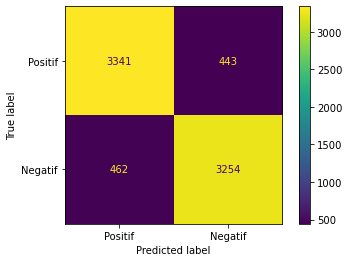

In [55]:
cm_bow=confusion_matrix(Y_test,lr_bow_predict,labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bow, display_labels=['Positif', 'Negatif'])
disp.plot()